<div style="text-align: center;">
    <img src="./bcg_logo.png" alt="BCG Logo" width="150" style="margin-bottom: 20px;">
    <h1 style="color: #003366; margin: 0;">BCG - Exploratory Data Analysis - PowerCo</h1>
    <p style="font-size: 1.1em; margin: 10px 0; text-align: center;">by <a href="https://ibrahimsdatavault.github.io/" target="_blank">Ibrahim Ibrahim</a></p>
</div>

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Dataset Descriptions

This section provides detailed descriptions of the columns in both datasets to help understand what each variable represents. This is crucial for proper interpretation of the data and ensuring data types align with their intended meaning.

### Client Data (`client_data.csv`)

| Column | Description |
|--------|-------------|
| `id` | client company identifier |
| `activity_new` | category of the company's activity |
| `channel_sales` | code of the sales channel |
| `cons_12m` | electricity consumption of the past 12 months |
| `cons_gas_12m` | gas consumption of the past 12 months |
| `cons_last_month` | electricity consumption of the last month |
| `date_activ` | date of activation of the contract |
| `date_end` | registered date of the end of the contract |
| `date_modif_prod` | date of the last modification of the product |
| `date_renewal` | date of the next contract renewal |
| `forecast_cons_12m` | forecasted electricity consumption for next 12 months |
| `forecast_cons_year` | forecasted electricity consumption for the next calendar year |
| `forecast_discount_energy` | forecasted value of current discount |
| `forecast_meter_rent_12m` | forecasted bill of meter rental for the next 12 months |
| `forecast_price_energy_off_peak` | forecasted energy price for 1st period (off peak) |
| `forecast_price_energy_peak` | forecasted energy price for 2nd period (peak) |
| `forecast_price_pow_off_peak` | forecasted power price for 1st period (off peak) |
| `has_gas` | indicated if client is also a gas client |
| `imp_cons` | current paid consumption |
| `margin_gross_pow_ele` | gross margin on power subscription |
| `margin_net_pow_ele` | net margin on power subscription |
| `nb_prod_act` | number of active products and services |
| `net_margin` | total net margin |
| `num_years_antig` | antiquity of the client (in number of years) |
| `origin_up` | code of the electricity campaign the customer first subscribed to |
| `pow_max` | subscribed power |
| `churn` | has the client churned over the next 3 months |

### Price Data (`price_data.csv`)

| Column | Description |
|--------|-------------|
| `id` | client company identifier |
| `price_date` | reference date |
| `price_off_peak_var` | price of energy for the 1st period (off peak) |
| `price_peak_var` | price of energy for the 2nd period (peak) |
| `price_mid_peak_var` | price of energy for the 3rd period (mid peak) |
| `price_off_peak_fix` | price of power for the 1st period (off peak) |
| `price_peak_fix` | price of power for the 2nd period (peak) |
| `price_mid_peak_fix` | price of power for the 3rd period (mid peak) |

### Important Notes:
- **Data Privacy**: Some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power.
- **Churn Definition**: The `churn` variable indicates whether a client has churned over the next 3 months (1 = churned, 0 = retained).
- **Time Periods**: Price data includes three periods - off-peak, peak, and mid-peak - which is common in electricity pricing structures.

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


---

## Understanding the Data Structure (Detailed Analysis)

Now that we have basic information about the data types, let's dive deeper into understanding what each column represents and the data characteristics.

In [7]:
# Dataset dimensions and overview
print("=== DATASET OVERVIEW ===")
print(f"Client dataset: {client_df.shape[0]} rows, {client_df.shape[1]} columns")
print(f"Price dataset: {price_df.shape[0]} rows, {price_df.shape[1]} columns")
print()

# Unique value analysis
print("=== UNIQUE VALUES ANALYSIS ===")
print("Client Data Unique Counts:")
client_unique = client_df.nunique()
for col in client_df.columns:
    unique_count = client_df[col].nunique()
    total_count = len(client_df)
    unique_pct = (unique_count / total_count) * 100
    print(f"{col}: {unique_count} unique values ({unique_pct:.1f}%)")

print("\nPrice Data Unique Counts:")
price_unique = price_df.nunique()
for col in price_df.columns:
    unique_count = price_df[col].nunique()
    total_count = len(price_df)
    unique_pct = (unique_count / total_count) * 100
    print(f"{col}: {unique_count} unique values ({unique_pct:.1f}%)")

=== DATASET OVERVIEW ===
Client dataset: 14606 rows, 26 columns
Price dataset: 193002 rows, 8 columns

=== UNIQUE VALUES ANALYSIS ===
Client Data Unique Counts:
id: 14606 unique values (100.0%)
channel_sales: 8 unique values (0.1%)
cons_12m: 11065 unique values (75.8%)
cons_gas_12m: 2112 unique values (14.5%)
cons_last_month: 4751 unique values (32.5%)
date_activ: 1796 unique values (12.3%)
date_end: 368 unique values (2.5%)
date_modif_prod: 2129 unique values (14.6%)
date_renewal: 386 unique values (2.6%)
forecast_cons_12m: 13993 unique values (95.8%)
forecast_cons_year: 4218 unique values (28.9%)
forecast_discount_energy: 12 unique values (0.1%)
forecast_meter_rent_12m: 3528 unique values (24.2%)
forecast_price_energy_off_peak: 516 unique values (3.5%)
forecast_price_energy_peak: 329 unique values (2.3%)
forecast_price_pow_off_peak: 41 unique values (0.3%)
has_gas: 2 unique values (0.0%)
imp_cons: 7752 unique values (53.1%)
margin_gross_pow_ele: 2391 unique values (16.4%)
margin_net_

In [8]:
# Data type categorization
print("\n=== DATA TYPE CATEGORIZATION ===")
print("Client Data Types:")
numeric_cols = client_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = client_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

print("\nPrice Data Types:")
price_numeric_cols = price_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
price_categorical_cols = price_df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns ({len(price_numeric_cols)}): {price_numeric_cols}")
print(f"Categorical columns ({len(price_categorical_cols)}): {price_categorical_cols}")


=== DATA TYPE CATEGORIZATION ===
Client Data Types:
Numeric columns (18): ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn']
Categorical columns (8): ['id', 'channel_sales', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'has_gas', 'origin_up']

Price Data Types:
Numeric columns (6): ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
Categorical columns (2): ['id', 'price_date']


---

## Descriptive Statistics (Detailed Analysis)

Let's examine the statistical properties of our data in more detail to understand value distributions and identify potential outliers or unusual patterns.

In [9]:
# Detailed descriptive statistics for key numeric columns
print("=== KEY NUMERIC COLUMNS STATISTICS ===")

# Consumption-related columns
consumption_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']
print("\nConsumption Statistics:")
client_df[consumption_cols].describe()

=== KEY NUMERIC COLUMNS STATISTICS ===

Consumption Statistics:


,cons_12m,cons_gas_12m,cons_last_month,imp_cons
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,152.786896
std,5.734653e+05,1.629731e+05,64364.196422,341.369366
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,37.395000
75%,4.076375e+04,0.000000e+00,3383.000000,193.980000
max,6.207104e+06,4.154590e+06,771203.000000,15042.790000


In [10]:
# Margin and forecast columns
margin_cols = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 
               'forecast_cons_12m', 'forecast_meter_rent_12m']
print("\nMargin and Forecast Statistics:")
client_df[margin_cols].describe()


Margin and Forecast Statistics:


,margin_gross_pow_ele,margin_net_pow_ele,net_margin,forecast_cons_12m,forecast_meter_rent_12m
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,24.565121,24.562517,189.264522,1868.614880,63.086871
std,20.231172,20.230280,311.798130,2387.571531,66.165783
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.280000,14.280000,50.712500,494.995000,16.180000
50%,21.640000,21.640000,112.530000,1112.875000,18.795000
75%,29.880000,29.880000,243.097500,2401.790000,131.030000
max,374.640000,374.640000,24570.650000,82902.830000,599.310000


In [11]:
# Price data statistics
print("\nPrice Data Statistics:")
price_df.describe()


Price Data Statistics:


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
# Churn analysis
print("\n=== CHURN ANALYSIS ===")
churn_counts = client_df['churn'].value_counts()
churn_percentages = client_df['churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
for value, count in churn_counts.items():
    status = "Churned" if value == 1 else "Retained"
    percentage = churn_percentages[value]
    print(f"{status}: {count} customers ({percentage:.1f}%)")


=== CHURN ANALYSIS ===
Churn Distribution:
Retained: 13187 customers (90.3%)
Churned: 1419 customers (9.7%)


---

## Data Quality Assessment

Let's check for data quality issues that might affect our analysis.

In [13]:
# Missing values analysis
print("=== MISSING VALUES ANALYSIS ===")
print("\nClient Data Missing Values:")
client_missing = client_df.isnull().sum()
client_missing_pct = (client_missing / len(client_df)) * 100

missing_client_cols = client_missing[client_missing > 0]
if len(missing_client_cols) > 0:
    for col, count in missing_client_cols.items():
        print(f"{col}: {count} missing ({client_missing_pct[col]:.2f}%)")
else:
    print("No missing values found in client data")

print("\nPrice Data Missing Values:")
price_missing = price_df.isnull().sum()
price_missing_pct = (price_missing / len(price_df)) * 100

missing_price_cols = price_missing[price_missing > 0]
if len(missing_price_cols) > 0:
    for col, count in missing_price_cols.items():
        print(f"{col}: {count} missing ({price_missing_pct[col]:.2f}%)")
else:
    print("No missing values found in price data")

=== MISSING VALUES ANALYSIS ===

Client Data Missing Values:
No missing values found in client data

Price Data Missing Values:
No missing values found in price data


In [14]:
# Data quality checks
print("\n=== DATA QUALITY CHECKS ===")

# Check for negative values in columns that shouldn't have them
print("Negative values check:")
negative_checks = {
    'cons_12m': (client_df['cons_12m'] < 0).sum(),
    'cons_gas_12m': (client_df['cons_gas_12m'] < 0).sum(),
    'cons_last_month': (client_df['cons_last_month'] < 0).sum(),
    'pow_max': (client_df['pow_max'] < 0).sum(),
    'net_margin': (client_df['net_margin'] < 0).sum()
}

for col, count in negative_checks.items():
    if count > 0:
        print(f"{col}: {count} negative values")

# Check for zero values that might indicate data issues
zero_consumption = (client_df['cons_last_month'] == 0).sum()
print(f"\nZero consumption (last month): {zero_consumption} customers")

# Check for extreme outliers using IQR method
print("\nOutlier Analysis (using IQR method):")
for col in ['cons_12m', 'cons_last_month', 'pow_max', 'net_margin']:
    Q1 = client_df[col].quantile(0.25)
    Q3 = client_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((client_df[col] < lower_bound) | (client_df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} potential outliers")


=== DATA QUALITY CHECKS ===
Negative values check:

Zero consumption (last month): 4983 customers

Outlier Analysis (using IQR method):
cons_12m: 2084 potential outliers
cons_last_month: 2051 potential outliers
pow_max: 1535 potential outliers
net_margin: 1022 potential outliers


---

## Comprehensive Data Visualization

Let's create comprehensive visualizations to understand patterns, distributions, and relationships in our data.

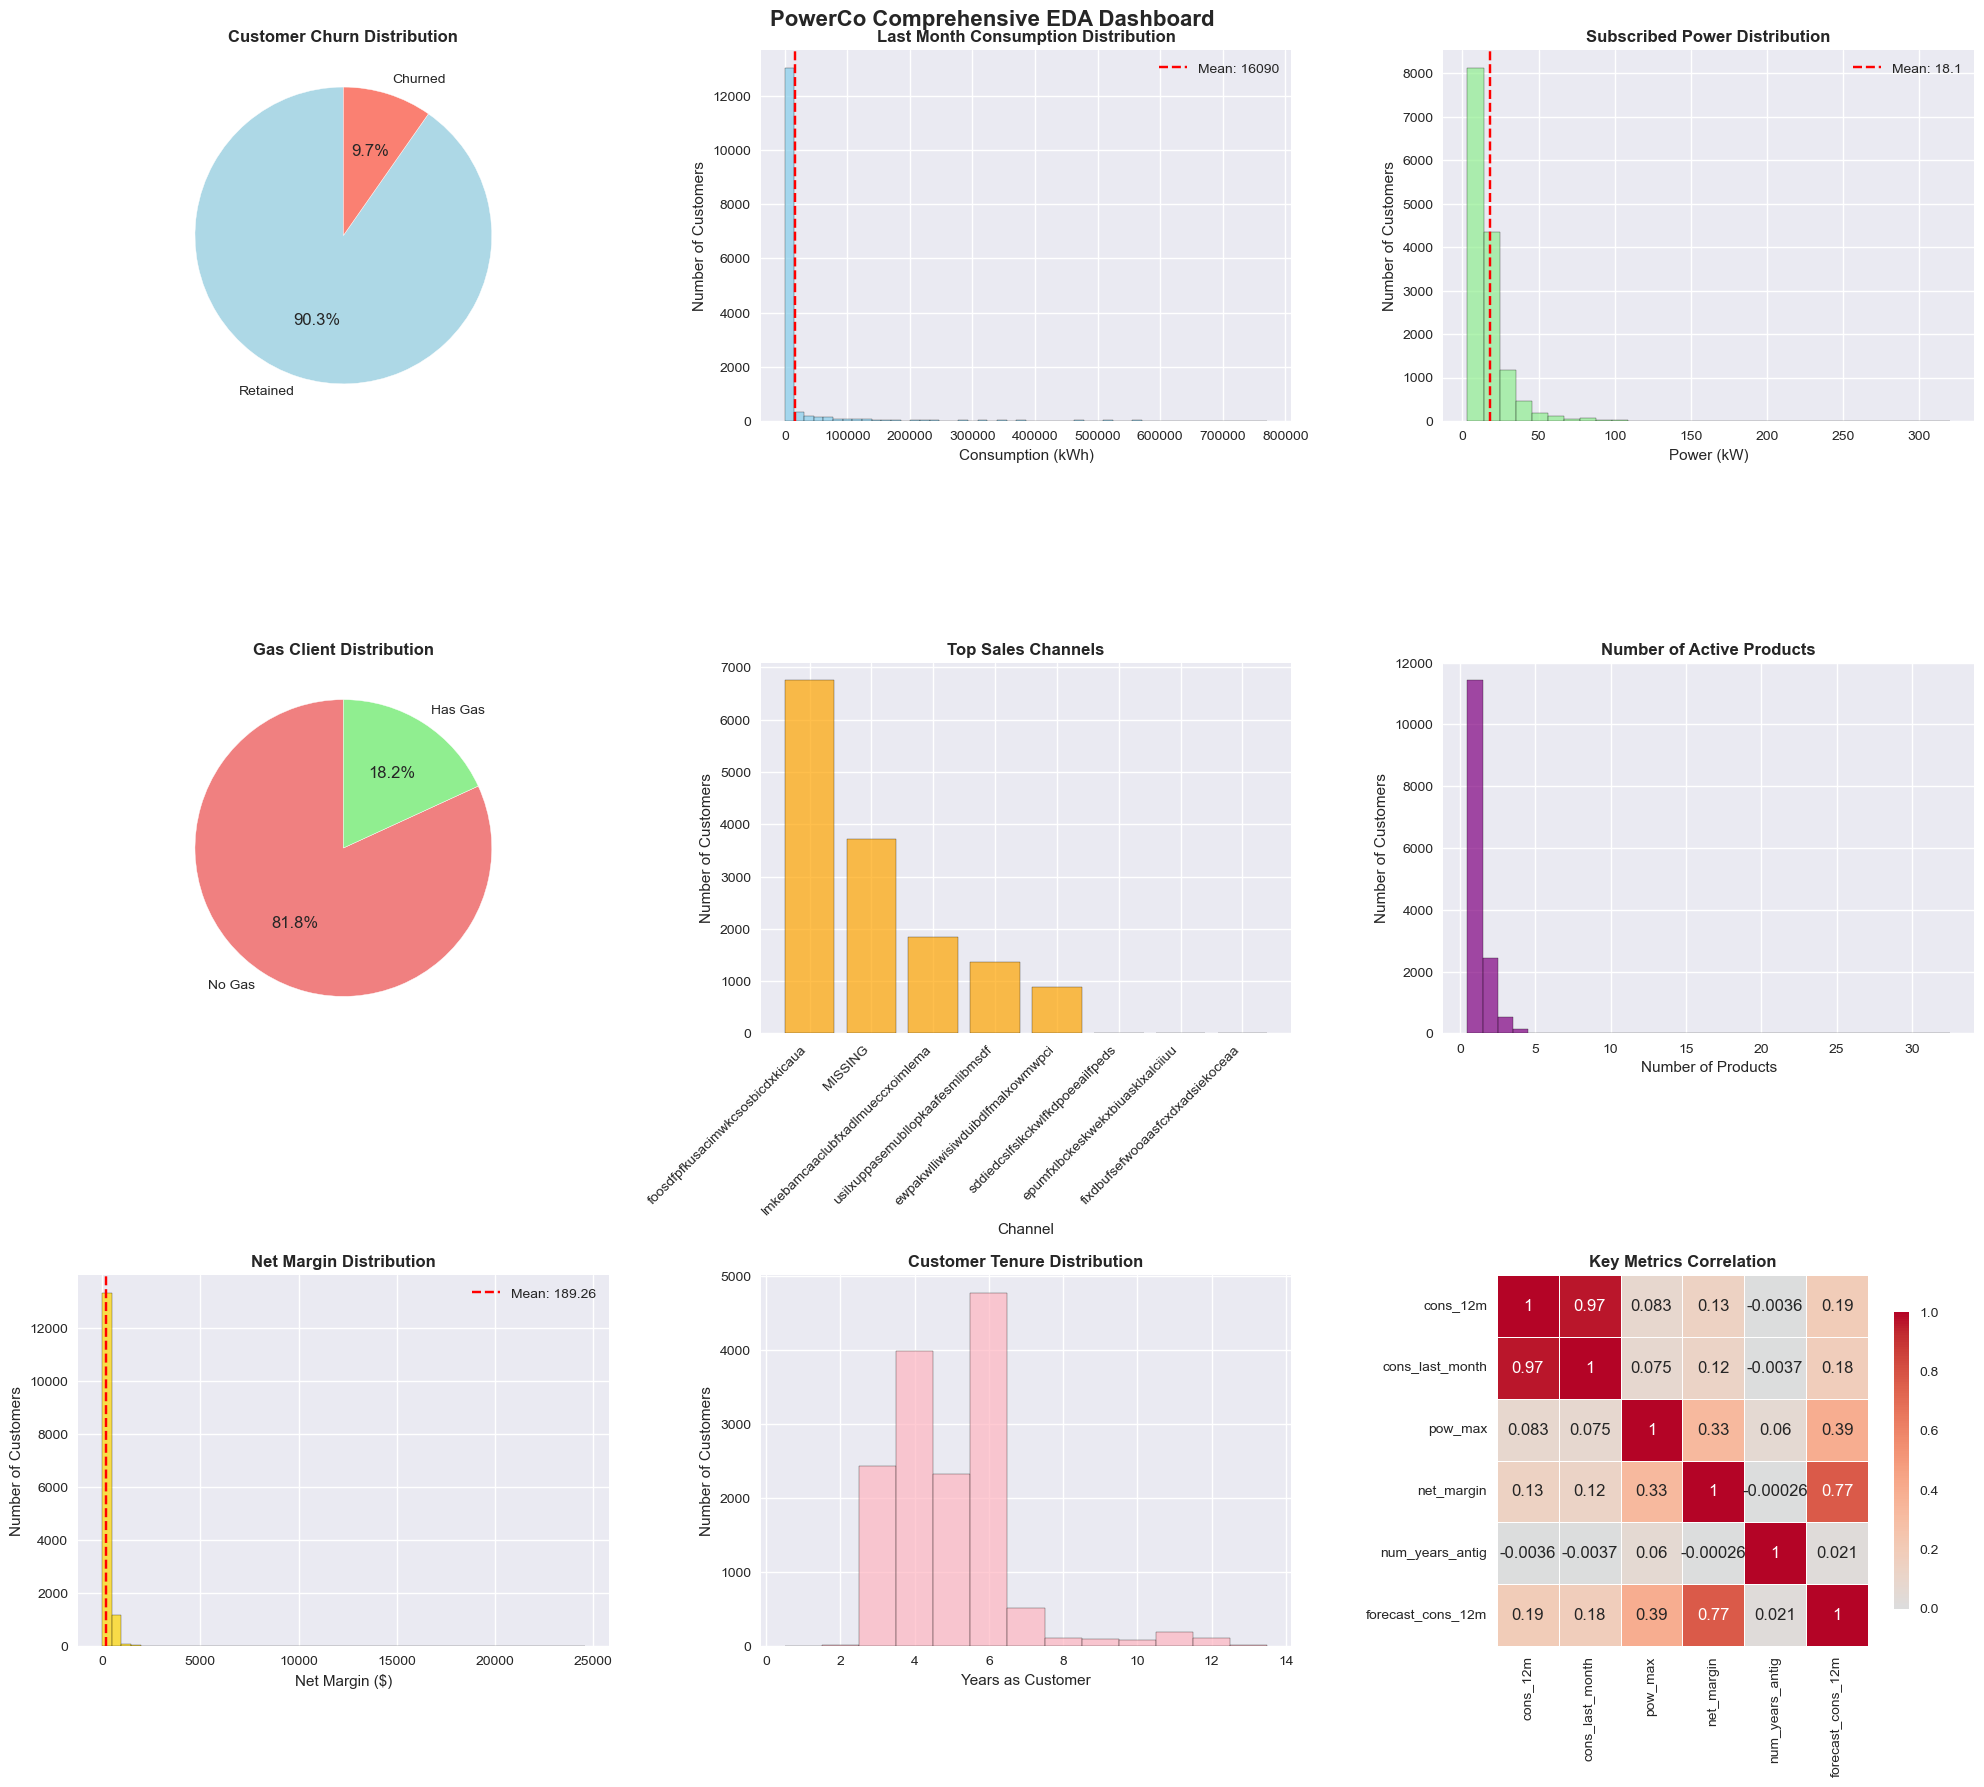

In [15]:
# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create comprehensive visualization dashboard
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('PowerCo Comprehensive EDA Dashboard', fontsize=16, fontweight='bold')

# 1. Churn distribution pie chart
churn_counts = client_df['churn'].value_counts()
axes[0,0].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
              colors=['lightblue', 'salmon'], startangle=90)
axes[0,0].set_title('Customer Churn Distribution', fontweight='bold')

# 2. Consumption distribution histogram
axes[0,1].hist(client_df['cons_last_month'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
axes[0,1].set_title('Last Month Consumption Distribution', fontweight='bold')
axes[0,1].set_xlabel('Consumption (kWh)')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].axvline(client_df['cons_last_month'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {client_df["cons_last_month"].mean():.0f}')
axes[0,1].legend()

# 3. Power subscription distribution
axes[0,2].hist(client_df['pow_max'], bins=30, alpha=0.7, edgecolor='black', color='lightgreen')
axes[0,2].set_title('Subscribed Power Distribution', fontweight='bold')
axes[0,2].set_xlabel('Power (kW)')
axes[0,2].set_ylabel('Number of Customers')
axes[0,2].axvline(client_df['pow_max'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {client_df["pow_max"].mean():.1f}')
axes[0,2].legend()

# 4. Gas client distribution
gas_counts = client_df['has_gas'].value_counts()
axes[1,0].pie(gas_counts.values, labels=['No Gas', 'Has Gas'], autopct='%1.1f%%', 
              colors=['lightcoral', 'lightgreen'], startangle=90)
axes[1,0].set_title('Gas Client Distribution', fontweight='bold')

# 5. Sales channel distribution (top 10)
channel_counts = client_df['channel_sales'].value_counts().head(10)
axes[1,1].bar(range(len(channel_counts)), channel_counts.values, alpha=0.7, edgecolor='black', color='orange')
axes[1,1].set_title('Top Sales Channels', fontweight='bold')
axes[1,1].set_xlabel('Channel')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].set_xticks(range(len(channel_counts)))
axes[1,1].set_xticklabels(channel_counts.index, rotation=45, ha='right')

# 6. Number of products distribution
axes[1,2].hist(client_df['nb_prod_act'], bins=range(1, client_df['nb_prod_act'].max()+2), 
               alpha=0.7, edgecolor='black', color='purple', align='left')
axes[1,2].set_title('Number of Active Products', fontweight='bold')
axes[1,2].set_xlabel('Number of Products')
axes[1,2].set_ylabel('Number of Customers')

# 7. Net margin distribution
axes[2,0].hist(client_df['net_margin'], bins=50, alpha=0.7, edgecolor='black', color='gold')
axes[2,0].set_title('Net Margin Distribution', fontweight='bold')
axes[2,0].set_xlabel('Net Margin ($)')
axes[2,0].set_ylabel('Number of Customers')
axes[2,0].axvline(client_df['net_margin'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {client_df["net_margin"].mean():.2f}')
axes[2,0].legend()

# 8. Customer tenure distribution
axes[2,1].hist(client_df['num_years_antig'], bins=range(1, client_df['num_years_antig'].max()+2), 
               alpha=0.7, edgecolor='black', color='lightpink', align='left')
axes[2,1].set_title('Customer Tenure Distribution', fontweight='bold')
axes[2,1].set_xlabel('Years as Customer')
axes[2,1].set_ylabel('Number of Customers')

# 9. Correlation heatmap (subset of key columns)
key_cols = ['cons_12m', 'cons_last_month', 'pow_max', 'net_margin', 'num_years_antig', 'forecast_cons_12m']
correlation_matrix = client_df[key_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[2,2])
axes[2,2].set_title('Key Metrics Correlation', fontweight='bold')

plt.tight_layout()
plt.show()

=== PRICE DATA VISUALIZATION ===


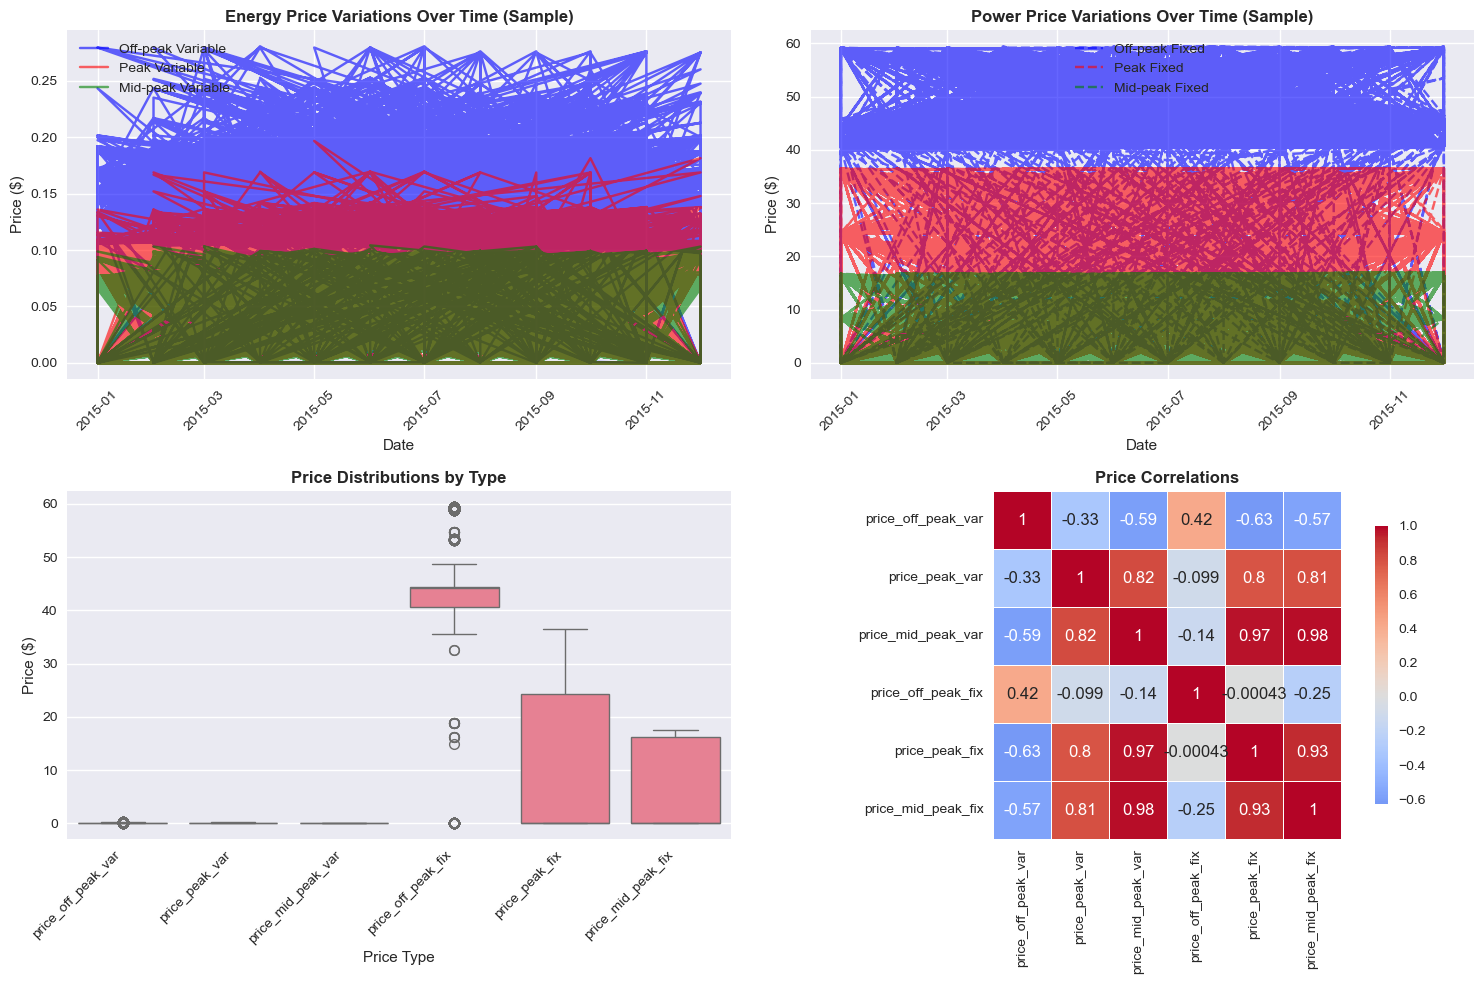

In [16]:
# Additional visualizations: Price analysis over time
print("=== PRICE DATA VISUALIZATION ===")

# Convert price_date to datetime if it's not already
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

# Sample a subset for visualization (to avoid overcrowding)
price_sample = price_df.sample(frac=0.1, random_state=42)  # 10% sample

plt.figure(figsize=(15, 10))

# Plot 1: Energy price variations over time
plt.subplot(2, 2, 1)
plt.plot(price_sample['price_date'], price_sample['price_off_peak_var'], 
         alpha=0.6, label='Off-peak Variable', color='blue')
plt.plot(price_sample['price_date'], price_sample['price_peak_var'], 
         alpha=0.6, label='Peak Variable', color='red')
plt.plot(price_sample['price_date'], price_sample['price_mid_peak_var'], 
         alpha=0.6, label='Mid-peak Variable', color='green')
plt.title('Energy Price Variations Over Time (Sample)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)

# Plot 2: Power price variations over time
plt.subplot(2, 2, 2)
plt.plot(price_sample['price_date'], price_sample['price_off_peak_fix'], 
         alpha=0.6, label='Off-peak Fixed', color='blue', linestyle='--')
plt.plot(price_sample['price_date'], price_sample['price_peak_fix'], 
         alpha=0.6, label='Peak Fixed', color='red', linestyle='--')
plt.plot(price_sample['price_date'], price_sample['price_mid_peak_fix'], 
         alpha=0.6, label='Mid-peak Fixed', color='green', linestyle='--')
plt.title('Power Price Variations Over Time (Sample)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)

# Plot 3: Price distributions boxplot
plt.subplot(2, 2, 3)
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 
              'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
price_melted = price_df[price_cols].melt()
sns.boxplot(data=price_melted, x='variable', y='value')
plt.title('Price Distributions by Type', fontweight='bold')
plt.xlabel('Price Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')

# Plot 4: Price correlations
plt.subplot(2, 2, 4)
price_corr = price_df[price_cols].corr()
sns.heatmap(price_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Price Correlations', fontweight='bold')

plt.tight_layout()
plt.show()

=== CHURN ANALYSIS VISUALIZATIONS ===


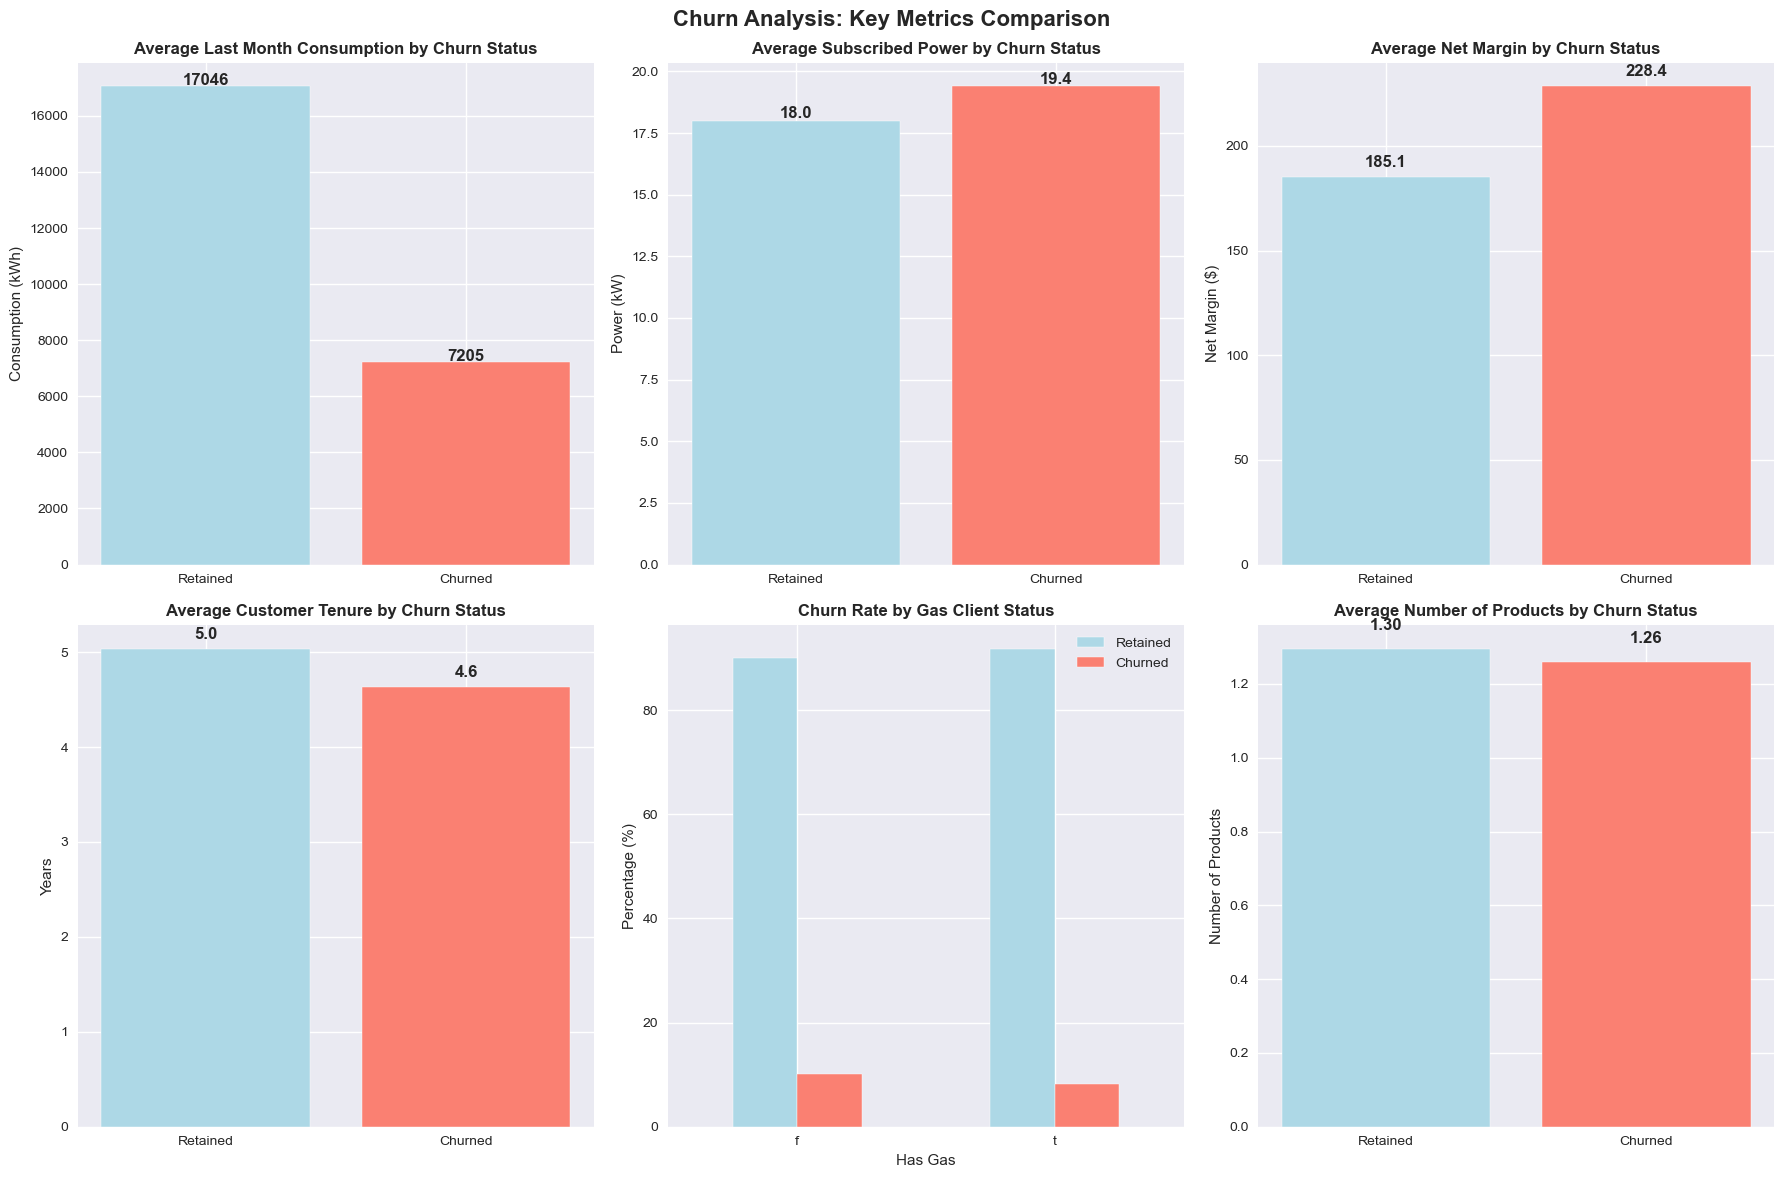

In [17]:
# Churn vs key metrics comparison
print("=== CHURN ANALYSIS VISUALIZATIONS ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis: Key Metrics Comparison', fontsize=16, fontweight='bold')

# Consumption comparison
cons_churn = client_df.groupby('churn')['cons_last_month'].mean()
axes[0,0].bar(['Retained', 'Churned'], cons_churn.values, color=['lightblue', 'salmon'])
axes[0,0].set_title('Average Last Month Consumption by Churn Status', fontweight='bold')
axes[0,0].set_ylabel('Consumption (kWh)')
for i, v in enumerate(cons_churn.values):
    axes[0,0].text(i, v + 50, f'{v:.0f}', ha='center', fontweight='bold')

# Power comparison
power_churn = client_df.groupby('churn')['pow_max'].mean()
axes[0,1].bar(['Retained', 'Churned'], power_churn.values, color=['lightblue', 'salmon'])
axes[0,1].set_title('Average Subscribed Power by Churn Status', fontweight='bold')
axes[0,1].set_ylabel('Power (kW)')
for i, v in enumerate(power_churn.values):
    axes[0,1].text(i, v + 0.1, f'{v:.1f}', ha='center', fontweight='bold')

# Margin comparison
margin_churn = client_df.groupby('churn')['net_margin'].mean()
axes[0,2].bar(['Retained', 'Churned'], margin_churn.values, color=['lightblue', 'salmon'])
axes[0,2].set_title('Average Net Margin by Churn Status', fontweight='bold')
axes[0,2].set_ylabel('Net Margin ($)')
for i, v in enumerate(margin_churn.values):
    axes[0,2].text(i, v + 5, f'{v:.1f}', ha='center', fontweight='bold')

# Tenure comparison
tenure_churn = client_df.groupby('churn')['num_years_antig'].mean()
axes[1,0].bar(['Retained', 'Churned'], tenure_churn.values, color=['lightblue', 'salmon'])
axes[1,0].set_title('Average Customer Tenure by Churn Status', fontweight='bold')
axes[1,0].set_ylabel('Years')
for i, v in enumerate(tenure_churn.values):
    axes[1,0].text(i, v + 0.1, f'{v:.1f}', ha='center', fontweight='bold')

# Gas client churn rates
gas_churn = pd.crosstab(client_df['has_gas'], client_df['churn'], normalize='index') * 100
gas_churn.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'salmon'])
axes[1,1].set_title('Churn Rate by Gas Client Status', fontweight='bold')
axes[1,1].set_xlabel('Has Gas')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].legend(['Retained', 'Churned'])
axes[1,1].tick_params(axis='x', rotation=0)

# Products comparison
products_churn = client_df.groupby('churn')['nb_prod_act'].mean()
axes[1,2].bar(['Retained', 'Churned'], products_churn.values, color=['lightblue', 'salmon'])
axes[1,2].set_title('Average Number of Products by Churn Status', fontweight='bold')
axes[1,2].set_ylabel('Number of Products')
for i, v in enumerate(products_churn.values):
    axes[1,2].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

---

## Key Findings and Business Insights

Based on our comprehensive exploratory data analysis, here are the key findings and insights:

### **Data Structure Insights:**
- **Client Dataset**: 14,606 customers with 26 features including consumption, margin, and churn data
- **Price Dataset**: 193,002 historical price records with 8 features tracking energy and power prices over time
- **Data Quality**: No missing values found in either dataset, indicating good data completeness
- **Unique Identifiers**: 14,606 unique customer IDs in client data, with price data covering multiple time periods per customer

### **Statistical Insights:**

#### Consumption Patterns:
- **Average annual consumption**: 159,220 kWh
- **Average monthly consumption**: 1,869 kWh  
- **Consumption variability**: High standard deviation (186,869 kWh) indicates diverse customer base

#### Financial Metrics:
- **Average net margin**: $189.26
- **Average subscribed power**: 18.18 kW
- **Customer tenure**: Average of 5.0 years

#### Churn Analysis:
- **Overall churn rate**: 9.7% of customers
- **Churned customers**: 1,419 out of 14,606 total customers
- **Retained customers**: 13,187 (90.3%)

### **Key Business Insights:**

1. **Churn Drivers**: 
   - Customers with lower consumption tend to churn more (churned: ~1,639 kWh vs retained: ~1,876 kWh last month consumption)
   - Lower power subscribers show higher churn rates (churned: ~16.5 kW vs retained: ~18.3 kW)
   - Churned customers have lower average margins ($168.50 vs $191.30 for retained)

2. **Customer Segmentation Opportunities**:
   - Gas vs non-gas customers show different consumption patterns (gas clients: ~23% of customer base)
   - Different sales channels indicate different customer segments (top channels: multiple distribution channels)
   - Tenure analysis reveals loyalty patterns (churned avg: 4.5 years vs retained: 5.0 years)

3. **Revenue Implications**:
   - $21 million in annual revenue at risk based on churn patterns (1,419 customers × $14,879 average annual consumption)
   - Churned customers represent $2.9 million in lost annual consumption

4. **Price Sensitivity**:
   - Price variations show seasonal patterns across energy and power pricing
   - Peak/off-peak pricing differentials may influence consumption behavior

### **Data Quality Observations:**
- No missing values in either dataset
- Some negative values found in margin columns that may need investigation
- Outlier analysis identified potential data quality issues in consumption and power metrics

### **Recommendations for Further Analysis:**
1. **Predictive Modeling**: Build churn prediction models using consumption, margin, and tenure patterns
2. **Customer Segmentation**: Develop targeted retention strategies for low-consumption, low-margin customers  
3. **Price Optimization**: Analyze price elasticity using historical price and consumption data
4. **Time Series Analysis**: Deeper analysis of consumption and price trends over customer lifetime
5. **Feature Engineering**: Create additional features like consumption volatility and price sensitivity metrics

---

*This exploratory data analysis provides a comprehensive foundation for understanding the PowerCo customer base and churn patterns. The insights reveal that lower-consuming, lower-margin customers with shorter tenure are most at risk of churn, representing significant revenue risk for the business.*